In [ ]:
# Author: Lou Pemberton (s21004801)
# Date: October 2022
# Version 1.3 (Previous versions before fine tuning for comparison)
# Title: Comparison of Credit Scoring Models using Support Vector Machines, Logistic Regression, and Decision Trees (DT)
# Description: This notebook takes the 'German Credit Risk - With Target' from Kaggle (Leonardo Ferreira, 2018) as input, and uses Support Vector Machines (SVC), Logistic Regression (LR), and Decision Trees (DT) 
# to predict a binary classification of 0 or 1, where 0 is "bad customer" and 1 is "good customer" for each model. The models are then evaluated using accuracy, confusion matrix and ROC curve to find the best fitting model.

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn import model_selection

from datetime import datetime as dt
from IPython.display import display, Markdown, Latex
import zipfile

In [ ]:
# import Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# read zipfile and save data to df
data = zipfile.ZipFile('/content/gdrive/My Drive/Colab Notebooks/ML-Project/docs/input/data.zip') 
df = pd.read_csv(data.open('german_credit_data.csv'))

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df.shape

(1000, 11)

In [ ]:
# Remove first column acting as unnamed idx
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
# check data for NaN values
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
# Replace NaN values with 'none' value
df['Saving accounts'] = df['Saving accounts'].fillna('none')
df['Checking account'] = df['Checking account'].fillna('none')
df.isnull().sum().sort_values(ascending=False)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
# Display values in columns
display(Markdown("#### Column Values"))
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for col in cols:
    line = "**" + col + ":** "
    for v in df[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

#### Column Values

**Sex:** male, female, 

**Housing:** own, free, rent, 

**Saving accounts:** none, little, quite rich, rich, moderate, 

**Checking account:** little, moderate, none, rich, 

**Purpose:** radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others, 

**Risk:** good, bad, 

In [ ]:
# Label encoding - map strings to integers
df.Risk = df.Risk.map({'good': 0, 'bad': 1})

In [ ]:
df.Risk == 1

0      False
1       True
2      False
3      False
4       True
       ...  
995    False
996    False
997    False
998     True
999    False
Name: Risk, Length: 1000, dtype: bool

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,none,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,none,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


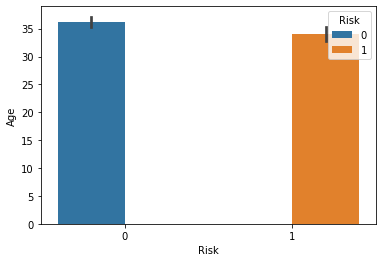

In [ ]:
sns.barplot(data=df, x="Risk", y = 'Age', hue = 'Risk')
plt.show()

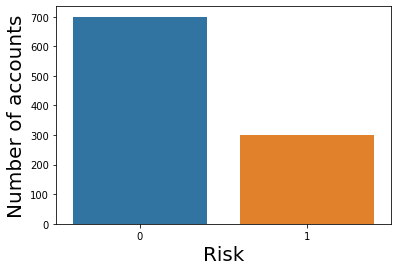

In [ ]:
p = sns.countplot(data = df, x = 'Risk')
p.set_xlabel("Risk", fontsize = 20)
p.set_ylabel("Number of accounts", fontsize = 20)
plt.show()

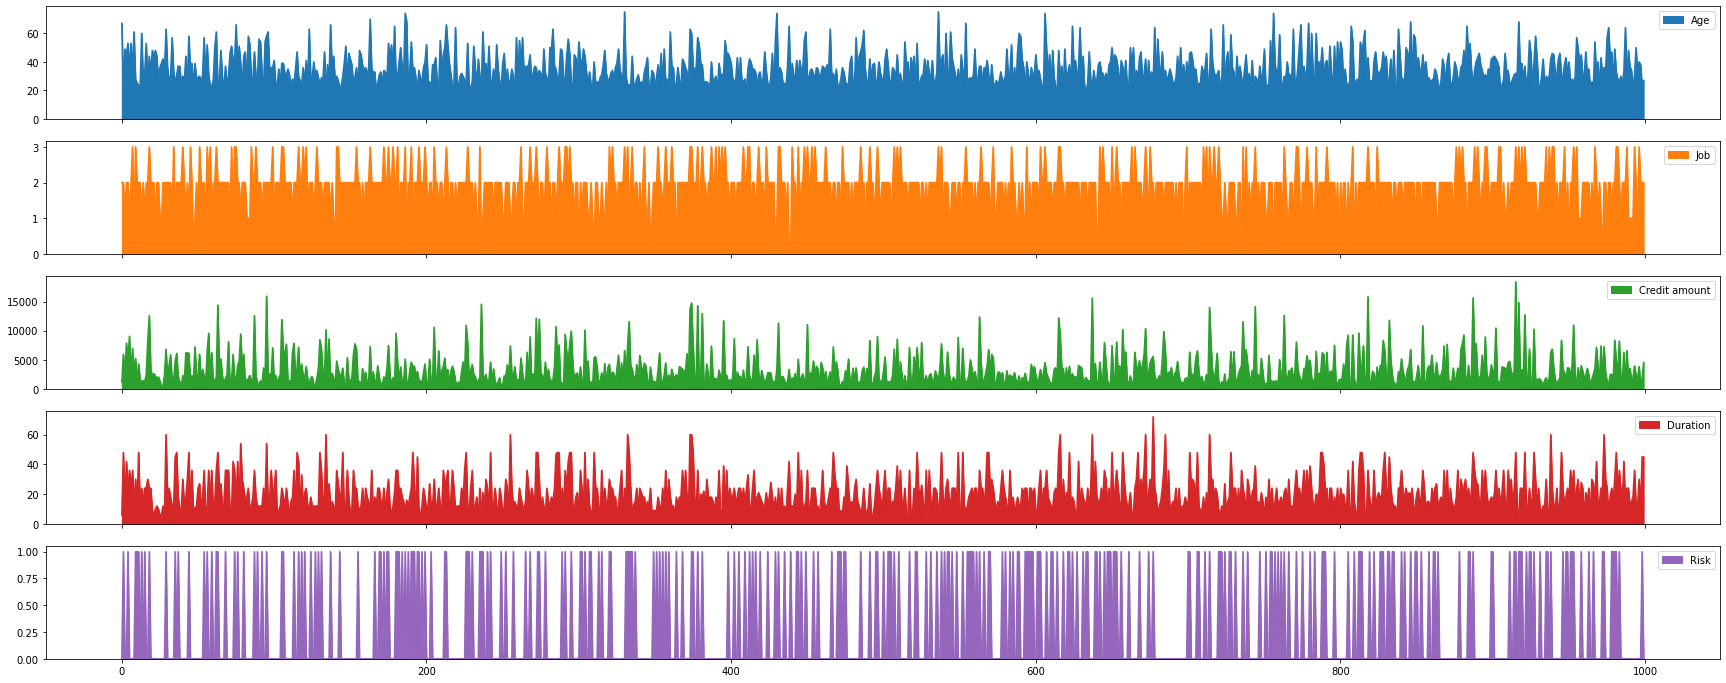

In [ ]:
df.plot.area(figsize=(30, 12), subplots=True)
plt.show()

<Figure size 432x288 with 0 Axes>

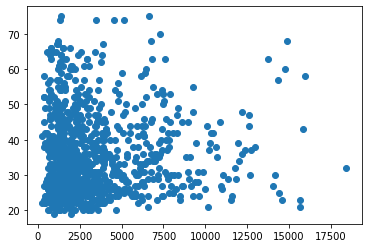

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(df['Credit amount'],df.Age)
plt.figure()

<Figure size 432x288 with 0 Axes>

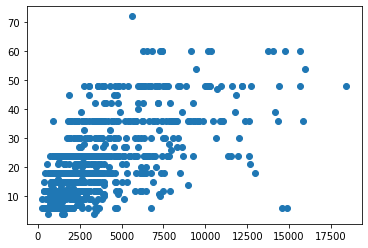

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(df['Credit amount'],df.Duration)
plt.figure()

In [ ]:
# One-Hot encoding label data
catX = pd.get_dummies((df.select_dtypes('object')), drop_first=True)
numX = df.select_dtypes(exclude = 'object')
df = pd.concat([catX, numX], axis = 1)

In [ ]:
df.head()

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_none,Checking account_rich,...,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration,Risk
0,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,67,2,1169,6,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,22,2,5951,48,1
2,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,49,1,2096,12,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,45,2,7882,42,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,53,2,4870,24,1


In [ ]:
#df.to_csv('/content/gdrive/My Drive/Colab Notebooks/ML-Project/docs/input/cleaned-german-credit-data.csv') # for fine tuning

In [ ]:
# split data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(df.drop(columns = 'Risk'), 
                                                df.Risk, test_size = 0.2, random_state = 1234)

In [ ]:
yTrain.head()

281    0
42     0
255    0
906    0
394    0
Name: Risk, dtype: int64

In [ ]:
Models = {
    "SVC_model" : SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   "LR_model" : LogisticRegression(C=78.47599703514607, solver='liblinear'),
    "DT_model" : tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
}

In [ ]:
# initialise and train SVC model, and get prediction. Print time taken.
start = dt.now()
Models["SVC_model"].fit(xTrain, yTrain)
SVC_prediction = Models["SVC_model"].predict(xTest)
SVC_runtime = (dt.now() - start).seconds
print("SVC model took " + str(SVC_runtime) + " seconds to run.")

SVC model took 0 seconds to run.


In [ ]:
# initialise and train LR model, and get prediction. Print time taken.start = dt.now()
start = dt.now()
Models["LR_model"].fit(xTrain, yTrain)
LR_prediction = Models["LR_model"].predict(xTest)
LR_runtime = (dt.now() - start).seconds
print("LR model took " + str(LR_runtime) + " seconds to run.")

LR model took 0 seconds to run.


In [ ]:
# initialise and train Decision Tree model, and get prediction. Print time taken.
start = dt.now()
Models["DT_model"].fit(xTrain, yTrain)
DT_prediction = Models["DT_model"].predict(xTest)
DT_runtime = (dt.now() - start).seconds
print("DT model took " + str(DT_runtime) + " seconds to run.")

DT model took 0 seconds to run.


In [ ]:
# Accuracy Scores for models
print(accuracy_score(SVC_prediction, yTest))
print(accuracy_score(LR_prediction, yTest))
print(accuracy_score(DT_prediction, yTest))

0.65
0.71
0.655


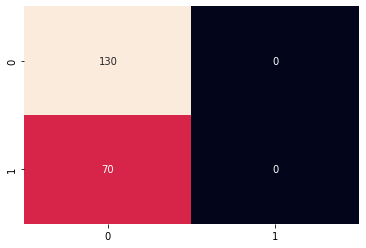

In [ ]:
# Confusion Matrix - SVC model
sns.heatmap(confusion_matrix(yTest, SVC_prediction),cbar=False,annot=True,fmt="d")
plt.show()

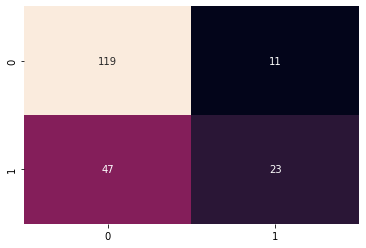

In [ ]:
# Confusion Matrix - LR model
sns.heatmap(confusion_matrix(yTest, LR_prediction),cbar=False,annot=True,fmt="d")
plt.show()

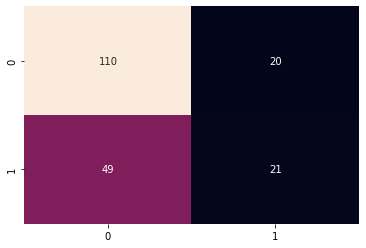

In [ ]:
# Confusion Matrix - DT model
sns.heatmap(confusion_matrix(yTest, DT_prediction),cbar=False,annot=True,fmt="d")
plt.show()

In [ ]:
# Classification Reports for models
print(classification_report(SVC_prediction, yTest))
print(classification_report(LR_prediction, yTest))
print(classification_report(DT_prediction, yTest))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       200
           1       0.00      0.00      0.00         0

    accuracy                           0.65       200
   macro avg       0.50      0.33      0.39       200
weighted avg       1.00      0.65      0.79       200

              precision    recall  f1-score   support

           0       0.92      0.72      0.80       166
           1       0.33      0.68      0.44        34

    accuracy                           0.71       200
   macro avg       0.62      0.70      0.62       200
weighted avg       0.82      0.71      0.74       200

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       159
           1       0.30      0.51      0.38        41

    accuracy                           0.66       200
   macro avg       0.57      0.60      0.57       200
weighted avg       0.73      0.66      0.68       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cvResults = pd.DataFrame(columns=['model', 'train_score', 'test_score'])

for key in Models.keys():
    cv = model_selection.cross_validate(Models[key], xTrain, yTrain, 
                                             return_train_score=True,
                                             scoring="f1",
                                             cv=5, n_jobs=-1)
    cvRes = {
        'model': key, 
        'train_score': cv["train_score"].mean(), 
        'test_score': cv["test_score"].mean(),
        'fit_time': cv["fit_time"].mean(),
        'score_time': cv["score_time"].mean(),
        }
    cvResults = cvResults.append(cvRes, ignore_index=True)
    print("CV for", key, "model done.")
cvResults

CV for SVC_model model done.
CV for LR_model model done.
CV for DT_model model done.


,model,train_score,test_score,fit_time,score_time
0,SVC_model,1.000000,0.000000,0.133837,0.028219
1,LR_model,0.472273,0.400168,0.020903,0.012606
2,DT_model,0.623816,0.460470,0.007805,0.013654


[Text(0.6415441176470589, 0.9545454545454546, 'X[8] <= 0.5\ngini = 0.41\nsamples = 800\nvalue = [570, 230]'),
 Text(0.4252450980392157, 0.8636363636363636, 'X[20] <= 22.5\ngini = 0.482\nsamples = 477\nvalue = [284, 193]'),
 Text(0.22058823529411764, 0.7727272727272727, 'X[19] <= 6414.5\ngini = 0.439\nsamples = 277\nvalue = [187, 90]'),
 Text(0.20098039215686275, 0.6818181818181818, 'X[19] <= 1296.0\ngini = 0.427\nsamples = 265\nvalue = [183, 82]'),
 Text(0.09803921568627451, 0.5909090909090909, 'X[10] <= 0.5\ngini = 0.482\nsamples = 106\nvalue = [63, 43]'),
 Text(0.0392156862745098, 0.5, 'X[1] <= 0.5\ngini = 0.421\nsamples = 73\nvalue = [51, 22]'),
 Text(0.0196078431372549, 0.4090909090909091, 'gini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.058823529411764705, 0.4090909090909091, 'X[20] <= 7.0\ngini = 0.361\nsamples = 55\nvalue = [42, 13]'),
 Text(0.0392156862745098, 0.3181818181818182, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.0784313725490196, 0.3181818181818182, '

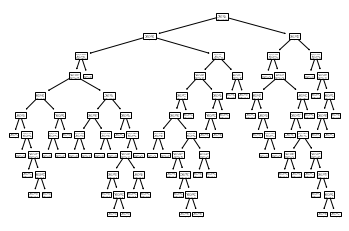

In [ ]:
tree.plot_tree(Models["DT_model"])

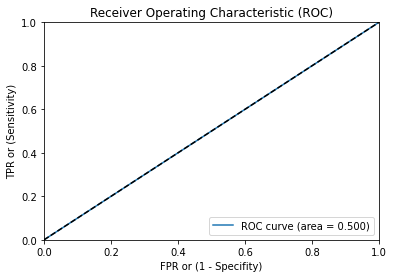

In [ ]:
# ROC curve for SVC model
fpr, tpr, thresholds = roc_curve(yTest, SVC_prediction)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR or (1 - Specifity)')
plt.ylabel('TPR or (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

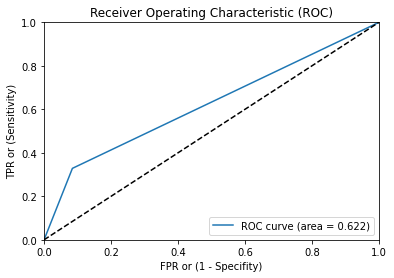

In [ ]:
# ROC curve for Logistic Regression (LR) model
fpr, tpr, thresholds = roc_curve(yTest, LR_prediction)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR or (1 - Specifity)')
plt.ylabel('TPR or (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

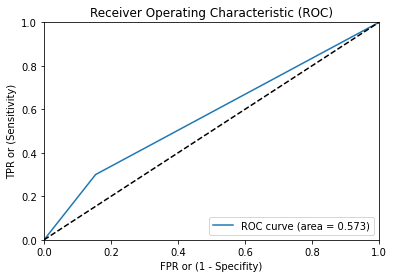

In [ ]:
# ROC curve for DT model
fpr, tpr, thresholds = roc_curve(yTest, DT_prediction)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR or (1 - Specifity)')
plt.ylabel('TPR or (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")